<a href="https://colab.research.google.com/github/me-smishra27/Telecom_Churn_Analysis/blob/main/Team_Power_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#"churn” with respect to the Telecom industry, is defined as the percentage of subscribers moving from a specific service or a service provider to another in a given period of time.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/AlmaBetter/Python for Data Science/Capston Project/Copy of Telecom Churn.csv'
tele_df=pd.read_csv(filepath)

In [ ]:
tele_df.rename(columns={ 'Account length':'acc_length', 'Area code':'area_code', 'International plan':'intl_plan',
       'Voice mail plan':'voice_mail_plan', 'Number vmail messages':'num_vmail_msg', 'Total day minutes':'ttl_day_min',
       'Total day calls':'ttl_day_calls', 'Total day charge':'ttl_day_chrg', 'Total eve minutes':'ttl_eve_min',
       'Total eve calls':'ttl_eve_calls', 'Total eve charge':'ttl_eve_chrg', 'Total night minutes':'ttl_nyt_min',
       'Total night calls':'ttl_nyt_calls', 'Total night charge':'ttl_nyt_chrg', 'Total intl minutes':'ttl_intl_min',
       'Total intl calls':'ttl_intl_calls', 'Total intl charge':'ttl_intl_chrg', 'Customer service calls':'cust_servc_calls'},inplace=True)

In [ ]:
tele_df.head()

,State,acc_length,area_code,intl_plan,voice_mail_plan,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



***INITIAL BRAIN STORMING ON DATA SET***


1.   What is the rate of churn as per the given data?
2.   Are the churners uniformly distributed over all the states or some states have higher rates than other?
3.   Are the churners uniformly distributed over all the are codes ?
4.   Correation between Churners and other features ?



In [ ]:
churning_rate = (tele_df[tele_df['Churn']==True]['Churn'].count()/tele_df['Churn'].count())*100
print('The rate of churning is',round(churning_rate,2),'%')


The rate of churning is 14.49 %


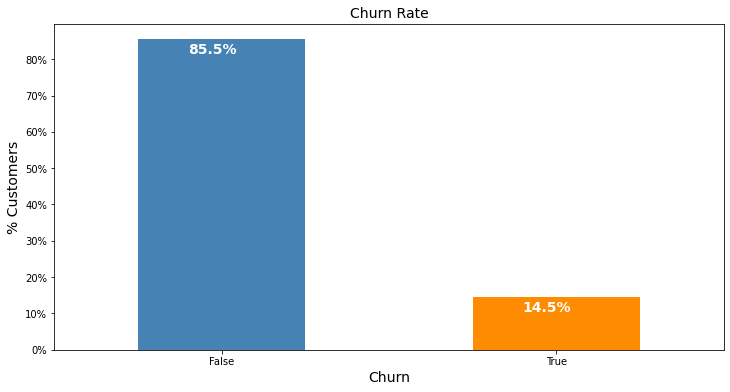

In [ ]:
colors = ['steelblue','darkorange']
churn_per = (tele_df['Churn'].value_counts()*100.0 /len(tele_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (12,6))

churn_per.set_ylabel('% Customers',size = 14)
churn_per.set_xlabel('Churn',size = 14)
churn_per.set_title('Churn Rate', size = 14)
churn_per.yaxis.set_major_formatter(mtick.PercentFormatter())

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in churn_per.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in churn_per.patches:
# get_width pulls left or right; get_y pushes up or down
    churn_per.text(i.get_x()+.15, i.get_height()-4.0, \
                str(round((i.get_height()/total), 1))+'%',
                fontsize=12,
                color='white',
              weight = 'bold',
              size = 14)



##   Churn is a one of the biggest problem in the telecom industry. Research has shown that the average yearly churn rate among the top 4 telecom companies in the US is 21%. 

##  14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.



# Find state wise churn distribution , plot bar graph corresponding to it.


In [ ]:
tele_df1=tele_df[tele_df['Churn']==True].groupby(['State','Churn'],as_index=False).Churn.count()

In [ ]:
tele_df1['total_count']=tele_df.groupby('State').State.transform('count')

In [ ]:
tele_df1['Churn_per']=tele_df1['Churn']/tele_df1['total_count']*100

In [ ]:
tele_df1.set_index('State',inplace=True)

* Narrowing down our scope and identifying critical states with maximum churn rate.  
* Study has been conducted on top 35 states which contributes 80% of the churners




Churn    83.022774
dtype: float64


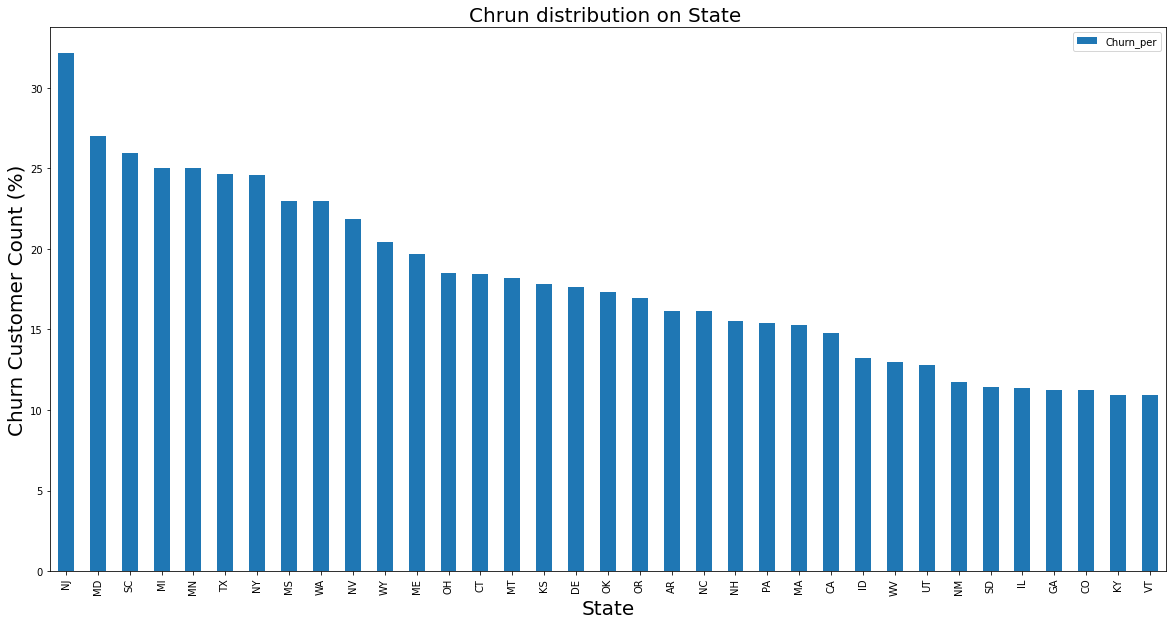

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# plt.plot(df1.nlargest(51,'Churn'))

tele_df1[['Churn_per']].nlargest(35,'Churn_per').plot(kind='bar')
plt.title('Chrun distribution on State ', fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Churn Customer Count (%)',fontsize=20)

total_sum = tele_df1[['Churn']].nlargest(35,'Churn').sum()
percent = total_sum/tele_df1['Churn'].sum()*100
print(percent)

In [ ]:
plt.figure(figsize=(20,10)
tele_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'steelblue')


AttributeError: ignored

<Figure size 1440x720 with 0 Axes>

In [ ]:
df12=tele_df[tele_df['Churn']==True]
# df12.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'midnightblue')
df12.shape

(483, 21)

# Charge per minute of Churn and non  Churn Customer

In [ ]:
tele_df['charge_per_min_day'] =tele_df['Total day charge']/tele_df['Total day minutes']
tele_df['charge_per_min_eve'] =tele_df['Total eve charge']/tele_df['Total eve minutes']
tele_df['charge_per_min_night'] =tele_df['Total night charge']/tele_df['Total night minutes']

In [ ]:
# For non churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==False]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==False]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==False]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000331531507384 0.08500123332733626 0.0450003662063208


In [ ]:
#For Churn customer
chrg_p_min_day_mean = tele_df[tele_df['Churn']==True]['charge_per_min_day'].mean()
chrg_p_min_eve_mean = tele_df[tele_df['Churn']==True]['charge_per_min_eve'].mean()
chrg_p_min_night_mean = tele_df[tele_df['Churn']==True]['charge_per_min_night'].mean()
print(chrg_p_min_day_mean,chrg_p_min_eve_mean,chrg_p_min_night_mean)

0.17000275572453427 0.08500081707432333 0.0450002247152355


**There is no difference between charge per minute for churn and non churn customer**

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Histogram plot for account length')

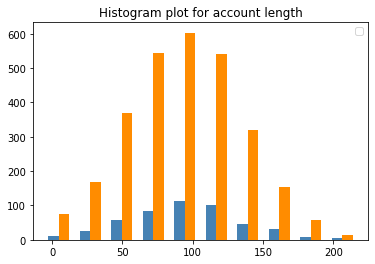

In [ ]:

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['acc_length'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['acc_length'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax.legend()
plt.title('Histogram plot for account length')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


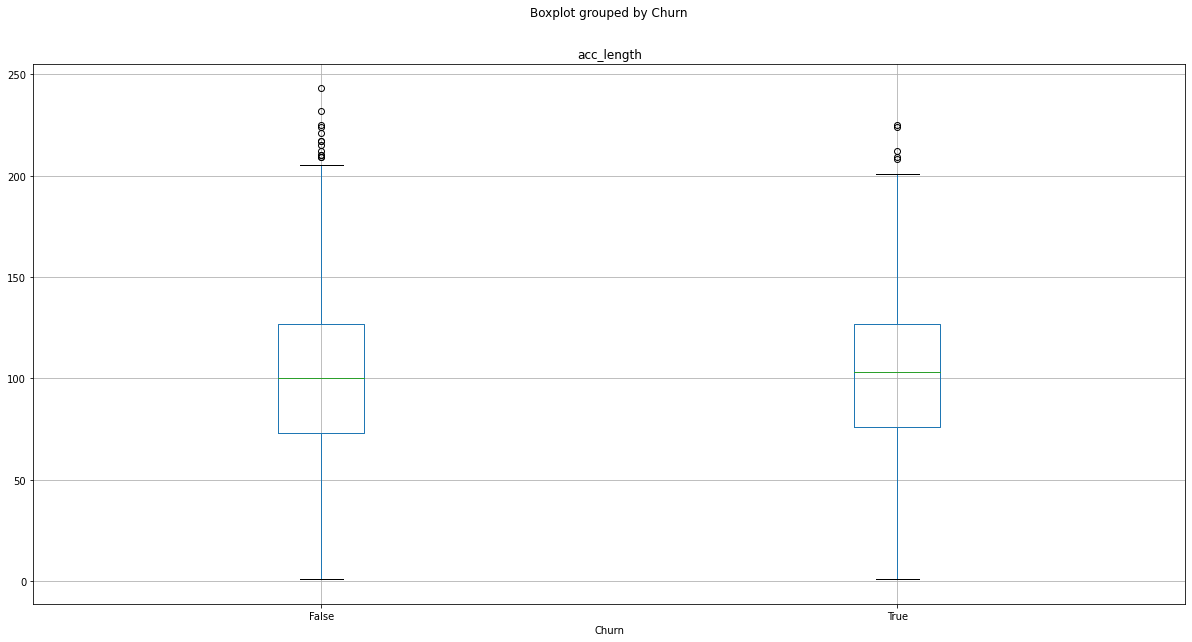

In [ ]:
tele_df.boxplot(column='acc_length', by='Churn')


**We did not get any inference from the “Histogram” therefore we plotted “BOX plot” and we reached to a conclusion that median of account length was higher for Churners. This depicts that the customers with higher account length are leaving after experiencing poor services.
More focus should be done on longer account length customers as they might become the loyal customers if served properly.**


In [ ]:
tdf_CT=tdf1[tdf1['Churn']==True]

In [ ]:
tdf_CF=tdf1[tdf1['Churn']==False]

In [ ]:
tdf_CT.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [ ]:
tdf_CF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


In [ ]:
#                   acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	  ttl_eve_calls	 ttl_eve_chrg	 ttl_nyt_min	ttl_nyt_calls	 ttl_nyt_chrg	 ttl_intl_min	 ttl_intl_calls	 ttl_intl_chrg	cust_servc_calls

# mean_churn False	100.793684	437.074737	8.604561	      175.175754	 100.283158	    29.780421	    199.043298	  100.038596	   16.918909	   200.133193	   100.058246	   9.006074	     10.158877	   4.532982	       2.743404	       1.449825

# mean_churn True 	102.664596	437.817805	5.115942	      206.914079	 101.335404	    35.175921	    212.410145	  100.561077	   18.054969	   205.231677	   100.399586	    9.235528	   10.70000	     4.163561	       2.889545	       2.229814


Observation from above data:-

2.they are making more day calls then other timeline (in number of calls)

3.their call duration for daytime is more as compare to other timeline (in minutes)

4.loyal customer prefer voice mail more than churning customer(when network is busy)

In [ ]:
# plt.hist(tdf1['ttl_eve_min'])
# plt.hist(tdf1['ttl_nyt_min'])
# plt.hist(tdf1[tdf1['Churn']==True]['acc_length'])
# plt.hist(tdf1[tdf1['Churn']==False]['acc_length'])
# plt.hist(tdf1[tdf1['Churn']==False]['ttl_day_min'])
# plt.hist(tdf1[tdf1['Churn']==False]['ttl_eve_min'])
# plt.hist(tdf1['ttl_day_min'])

In [ ]:
tdf_CT_VT=tdf_CT[tdf_CT['voice_mail_plan']=='Yes']
tdf_CT_VF=tdf_CT[tdf_CT['voice_mail_plan']=='No']

In [ ]:
tdf_CF_VF=tdf_CF[tdf_CF['voice_mail_plan']=='No']
tdf_CF_VT=tdf_CF[tdf_CF['voice_mail_plan']=='Yes']

In [ ]:
tdf_CF_VF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,2008.000000,2008.000000,2008.0,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,100.739044,437.228088,0.0,173.188147,100.416335,29.442555,197.485707,100.135956,16.786489,199.290737,99.884960,8.968167,10.164890,4.547809,2.745000,1.460657
std,40.186010,42.457831,0.0,48.561105,19.786981,8.255304,50.273571,20.023552,4.273271,50.759755,19.465663,2.284203,2.797746,2.426951,0.755368,1.154030
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.0,142.400000,87.000000,24.210000,163.600000,87.000000,13.910000,166.275000,87.000000,7.480000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.0,175.700000,100.000000,29.870000,197.500000,100.000000,16.790000,198.450000,100.000000,8.930000,10.200000,4.000000,2.750000,1.000000
75%,128.000000,510.000000,0.0,207.200000,114.000000,35.220000,231.125000,114.000000,19.642500,232.825000,113.000000,10.480000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,0.0,310.400000,160.000000,52.770000,354.200000,164.000000,30.110000,395.000000,166.000000,17.770000,18.900000,19.000000,5.100000,7.000000


In [ ]:
tdf_CF_VT.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,100.923990,436.709026,29.124703,179.915796,99.965558,30.586164,202.757838,99.806413,17.234703,202.142280,100.471496,9.096473,10.144537,4.497625,2.739596,1.423990
std,39.172006,41.965074,7.576789,53.583008,19.843082,9.109155,50.171390,19.812121,4.264616,51.894404,19.608105,2.335354,2.754216,2.478563,0.743602,1.187347
min,1.000000,408.000000,4.000000,2.600000,35.000000,0.440000,42.200000,37.000000,3.590000,23.200000,38.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,415.000000,24.000000,143.500000,87.000000,24.400000,167.300000,87.000000,14.220000,165.700000,87.000000,7.460000,8.300000,3.000000,2.240000,1.000000
50%,101.000000,415.000000,29.000000,182.100000,101.000000,30.960000,203.850000,100.000000,17.325000,203.500000,101.000000,9.160000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,415.000000,34.000000,216.750000,113.000000,36.850000,236.575000,113.000000,20.107500,239.850000,113.750000,10.797500,12.000000,6.000000,3.240000,2.000000
max,221.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,381.900000,175.000000,17.190000,17.600000,18.000000,4.750000,8.000000


In [ ]:
tdf_CT_VF.describe()

,acc_length,area_code,num_vmail_msg,ttl_day_min,ttl_day_calls,ttl_day_chrg,ttl_eve_min,ttl_eve_calls,ttl_eve_chrg,ttl_nyt_min,ttl_nyt_calls,ttl_nyt_chrg,ttl_intl_min,ttl_intl_calls,ttl_intl_chrg,cust_servc_calls
count,403.000000,403.000000,403.0,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,102.258065,437.071960,0.0,212.934739,101.354839,36.199355,214.351117,100.481390,18.219876,207.613896,100.091811,9.342829,10.611663,4.069479,2.865707,2.158809
std,40.442981,42.323526,0.0,70.574627,22.166503,11.997781,51.870759,19.738755,4.408785,46.636824,20.107646,2.098766,2.718947,2.436280,0.734194,1.813326
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,51.000000,2.130000,2.000000,1.000000,0.540000,0.000000
25%,75.500000,415.000000,0.0,154.450000,87.000000,26.260000,179.100000,87.000000,15.225000,172.950000,85.500000,7.785000,8.800000,2.000000,2.380000,1.000000
50%,101.000000,415.000000,0.0,228.600000,103.000000,38.860000,214.100000,101.000000,18.200000,208.000000,100.000000,9.360000,10.500000,3.000000,2.840000,2.000000
75%,126.500000,462.500000,0.0,269.750000,117.000000,45.860000,250.950000,113.500000,21.330000,241.200000,115.000000,10.855000,12.500000,5.000000,3.380000,4.000000
max,225.000000,510.000000,0.0,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,18.300000,15.000000,4.940000,9.000000


In [ ]:
# tdf_CT_VT.describe()

NameError: ignored

In [ ]:
# for Churn false 
#                         acc_length	area_code	  num_vmail_msg	  ttl_day_min	 ttl_day_calls	ttl_day_chrg	ttl_eve_min	 ttl_eve_calls	ttl_eve_chrg	ttl_nyt_min	ttl_nyt_calls	ttl_nyt_chrg	ttl_intl_min	ttl_intl_calls	ttl_intl_chrg	cust_servc_calls
# vmail plan false --mean	100.739044	437.228088	0.0	            173.188147	 100.416335	    29.442555	    197.485707	 100.135956	    16.786489	    199.290737	99.884960	     8.968167	    10.164890	    4.547809	       2.745000	      1.460657
# vmail plan true  --mean	100.923990	436.709026	29.124703	      179.915796	 99.965558	    30.586164	    202.757838	 99.806413	    17.234703	    202.142280	100.471496	   9.096473	    10.144537	    4.497625	       2.739596	      1.423990

# for Churn true
# vmail plan false --mean	102.258065	437.071960	0.0	            212.934739	 101.354839	     36.199355	  214.351117	 100.481390	    18.219876	    207.613896	 100.091811	   9.342829	     10.611663	  4.069479        	2.865707	     2.158809
# vmail plan true  --mean	104.712500	441.575000	30.887500     	176.58500	   101.237500	     30.020375	  202.632500	 100.962500	    17.224250	    193.231250	 101.950000	   8.695000	     11.145000	  4.637500	        3.009625	     2.587500


## Area Code wise Customer(Churner and Non-Churner) Distribution

In [ ]:
state_list=tele_df1.nlargest(10,'Churn_per').index.values.tolist()
new_df=tele_df[tele_df['State'].isin(state_list)]

In [ ]:
df4=pd.crosstab(new_df['Churn'], new_df['area_code'], margins = True)

In [ ]:
df4.loc['False_per']=df4.iloc[0,:]/df4.iloc[2,:]*100
df4.loc['True_per']=df4.iloc[1,:]/df4.iloc[2,:]*100
df5=df4.transpose()

In [ ]:
df4=pd.crosstab(new_df['Churn'], new_df['area_code'], margins = True)


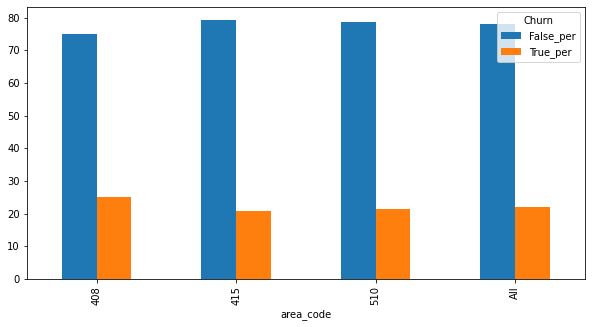

In [ ]:
df5.iloc[:,3:].plot(kind='bar')

For top 10 state( churn population percentage in each state) area code 408 has more churning population than other area code


## International plan affecting the churn rate

In [ ]:
df6 = tele_df.groupby(['Churn','intl_plan'])['intl_plan'].count()
df6.unstack()

# people having intl plan with false churning:

percent_false_intl = (df6.loc[False,'Yes']/df6.loc[False].sum())*100
print('The % of customers with false churning having intl plan is', round(percent_false_intl,2),'%')

# people having intl plan with true churning:

percent_true_intl  = (df6.loc[True,'Yes']/df6.loc[True].sum())*100
print('The % of customers with true churning having intl plan is',round(percent_true_intl,2),'%')


The % of customers with false churning having intl plan is 6.53 %
The % of customers with true churning having intl plan is 28.36 %


Text(0, 0.5, 'International plan')

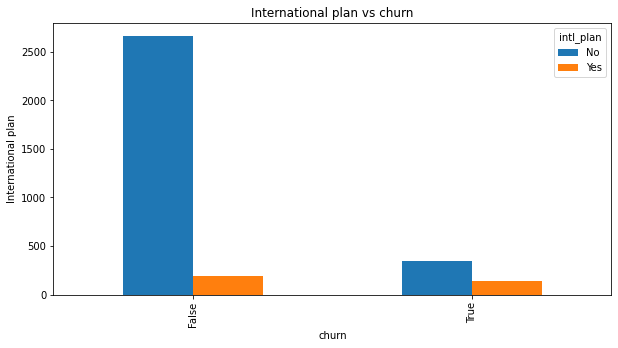

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df6.unstack().plot(kind='bar')
plt.title('International plan vs churn')
plt.xlabel('churn')
plt.ylabel('International plan')


*   Customer having international plan are more prone to churn.



## Voice mail plan affecting Churn rate

In [ ]:
df4 = new_df.groupby(['Churn', 'voice_mail_plan'])['voice_mail_plan'].count()
print(df4.unstack())
vmp_yes_true = (df4.unstack().loc[True,'Yes'] / df4.unstack().loc[True].sum())*100
print('The % of people with TRUE churning with voice plan activated', round(vmp_yes_true,2),'%')
vmp_yes_false = (df4.unstack().loc[False,'Yes'] / df4.unstack().loc[False].sum())*100
print('The % of people with FALSE churning with voice plan activated',round(vmp_yes_false,2),'%')


voice_mail_plan   No  Yes
Churn                    
False            396  156
True             132   23
The % of people with TRUE churning with voice plan activated 14.84 %
The % of people with FALSE churning with voice plan activated 28.26 %


Text(0, 0.5, 'voice mail plan no')

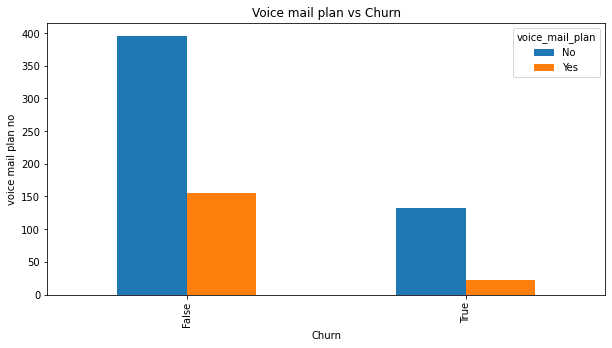

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df4.unstack().plot(kind='bar')
plt.title('Voice mail plan vs Churn')
plt.xlabel('Churn')
plt.ylabel('voice mail plan no')


* churning customer not having voice mail plan are more prone to leave.
voice mail plan are not affordable 

##Customer service calls affecting the Churn rate

In [ ]:
pd.crosstab(new_df['Churn'], new_df['cust_servc_calls'], margins = True)


cust_servc_calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,404,722,477,261,55,19,5,3,1,0,1947
True,80,97,73,33,61,32,13,3,1,2,395
All,484,819,550,294,116,51,18,6,2,2,2342


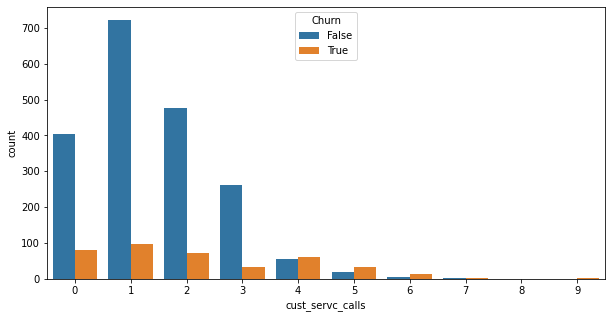

In [ ]:
sns.countplot(x = 'cust_servc_calls', hue = 'Churn', data = new_df)



In [ ]:
new_df['Service_calls'] = (new_df['cust_servc_calls'] > 3).astype('int')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pd.crosstab(new_df['Service_calls'], new_df['Churn'], margins = True)


Churn,False,True,All
Service_calls,,,
0,1613,258,1871
1,62,99,161
All,1675,357,2032


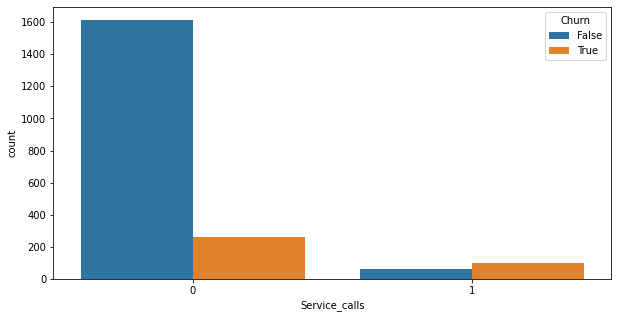

In [ ]:
sns.countplot(x = 'Service_calls', hue = 'Churn', data = new_df)


* Churn rate increases sharply from four customer service call and above

## Number of Voice mail messages affecting Churn

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


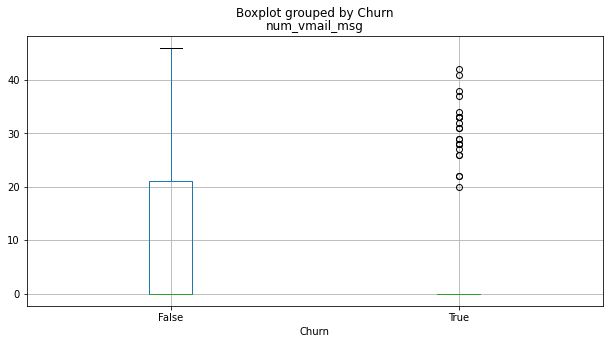

In [ ]:
new_df.boxplot(column='num_vmail_msg', by='Churn',figsize=(10,5))


* when there are more than 25 voice-mail messages then we get a chunk of people  indicating churn .Improving the voice-mail feature or setting a limit can improve the stats.
1. Voice-Mail Service Upgradation
2. Setting up a limit on Voice-Mail . 
3. Performance drop in  Voice-Mail after 25 voice mails.





Text(0.5, 1.0, 'Histogram plot for number of voice mails')

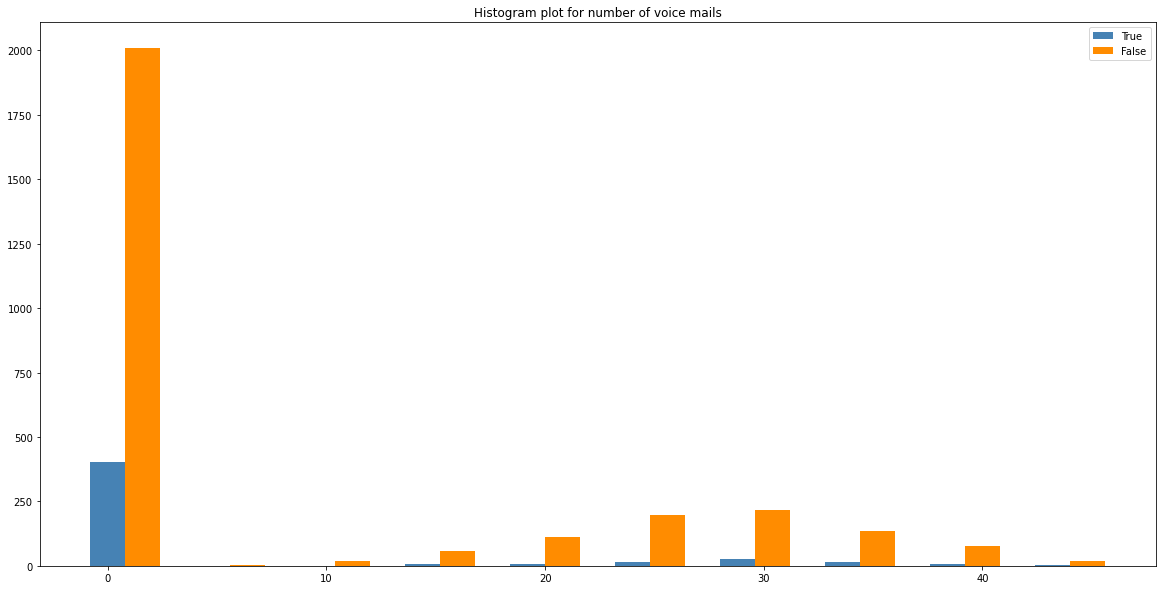

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))

a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['num_vmail_msg'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['num_vmail_msg'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax.legend(labels=['True','False'])
plt.title('Histogram plot for number of voice mails')

## Call Duration Effect on Churning

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f9806850>,
      dtype=object)

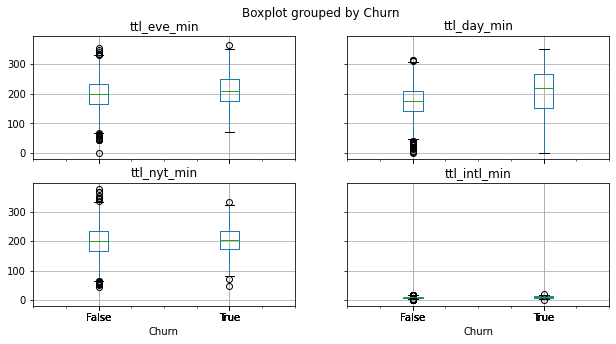

In [ ]:
new_df.boxplot(column=['ttl_eve_min','ttl_day_min','ttl_nyt_min','ttl_intl_min'], by='Churn')

Text(0.5, 1.0, 'Total night minutes')

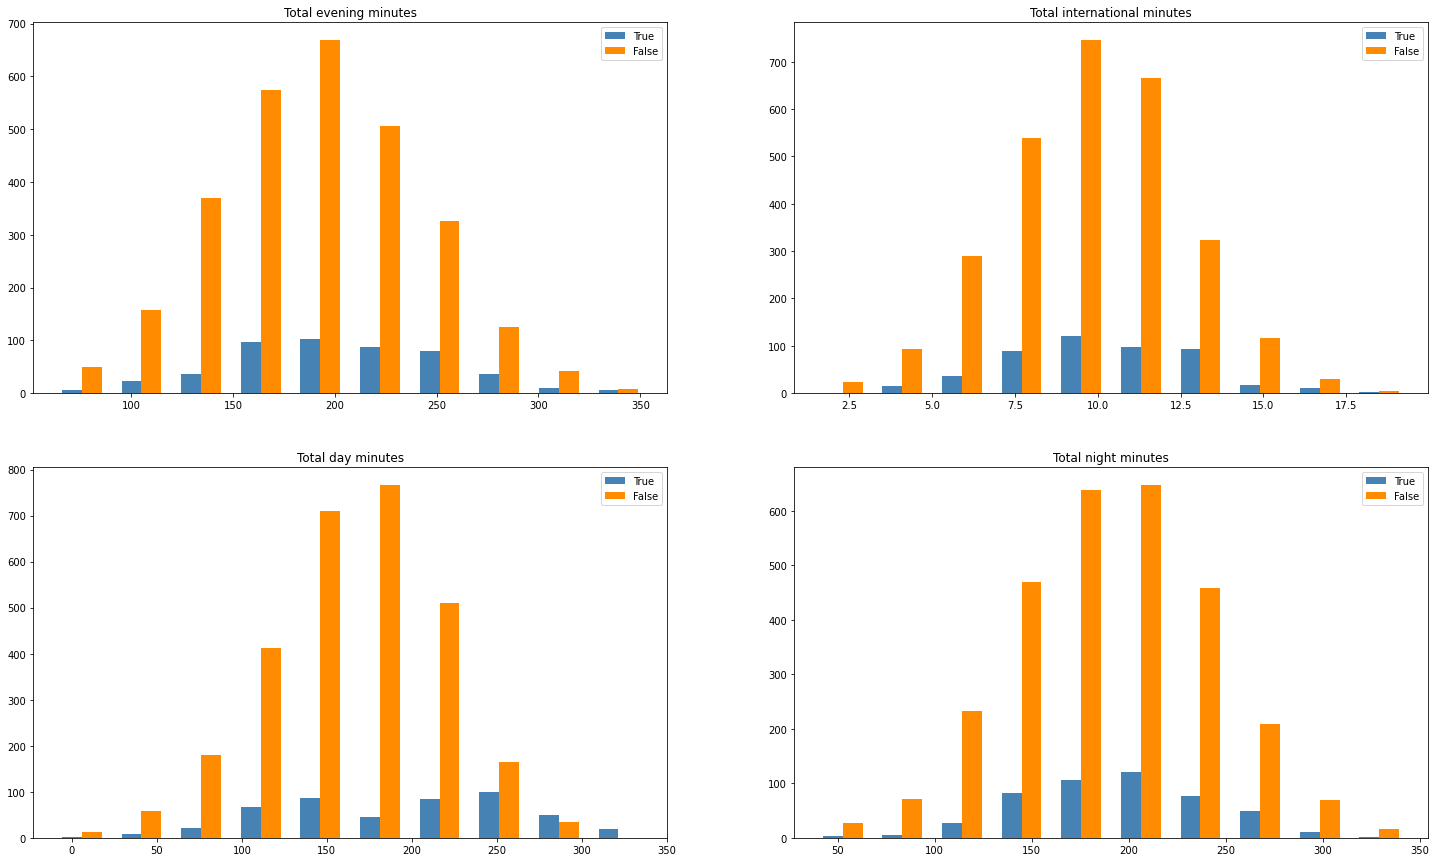

In [ ]:

fig, ax = plt.subplots(2,2,figsize=(25,15))

a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['ttl_eve_min'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['ttl_eve_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[0,0].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[0,0].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[0,0].legend(labels=['True','False'])
ax[0,0].set_title('Total evening minutes')

a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['ttl_intl_min'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['ttl_intl_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[0,1].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[0,1].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[0,1].legend(labels=['True','False'])
ax[0,1].set_title('Total international minutes')


a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['ttl_day_min'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['ttl_day_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[1,0].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[1,0].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[1,0].legend(labels=['True','False'])
ax[1,0].set_title('Total day minutes')

a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['ttl_nyt_min'])
b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['ttl_nyt_min'], bins=a_bins)


width = (a_bins[1] - a_bins[0])/3
ax[1,1].bar(a_bins[:-1], a_heights, width=width, facecolor='steelblue')
ax[1,1].bar(b_bins[:-1]+width, b_heights, width=width, facecolor='darkorange')
ax[1,1].legend(labels=['True','False'])
ax[1,1].set_title('Total night minutes')

In [ ]:
new_df1 = new_df.groupby(['Churn']).agg({'ttl_day_min':'median','ttl_eve_min':'median','ttl_nyt_min':'median','ttl_intl_min':'median'})
new_df1


,ttl_day_min,ttl_eve_min,ttl_nyt_min,ttl_intl_min
Churn,,,,
False,176.3,198.6,200.4,10.3
True,221.1,211.1,203.9,10.7


In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
new_df1.plot(kind='bar')
plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn-True')
plt.facecolor(['cornflowerblue','green','orange','red'])


NameError: ignored

* Above plot represents customer making call during day time for long duration are more prone to churn.

  We can infer from above day-night box-plot that with users spending more 210 minutes or more are switching to other operator.
Problems(on basis of assumption)  :
1. Network Disturbance during a Call
2. Noise during a call
Solution:
1. Need to Upgrade the service to improve Voice Quality.
2. Network Upgradation


## Number of call Effect on Churn

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03fa211ed0>,
      dtype=object)

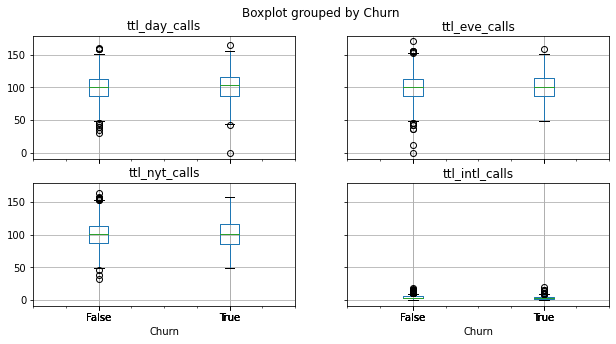

In [ ]:
new_df.boxplot(column=['ttl_day_calls','ttl_eve_calls','ttl_nyt_calls','ttl_intl_calls'], by='Churn')

* we can obseve that for the churn customer the median is slightly higher 
than 100 which indicates there are call drops which may lead to more calls .


In [ ]:

# fig, ax = plt.subplots()

# a_heights, a_bins = np.histogram(tele_df[tele_df['Churn']==True]['acc_length'])
# b_heights, b_bins = np.histogram(tele_df[tele_df['Churn']==False]['acc_length'], bins=a_bins)

# width = (a_bins[1] - a_bins[0])/3

# ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
# ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
# plt.title('Histogram plot for account length')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f9cb9a10>,
      dtype=object)

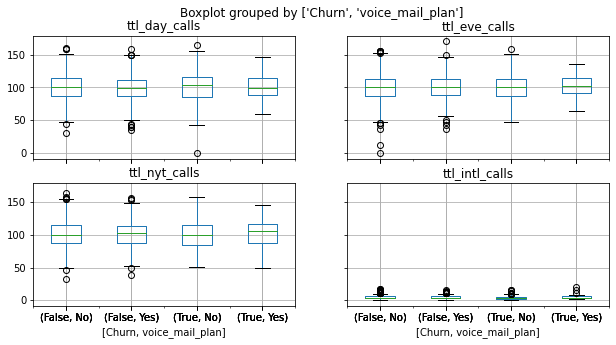

In [ ]:
new_df.boxplot(column=['ttl_day_calls','ttl_eve_calls','ttl_nyt_calls','ttl_intl_calls'], by=['Churn','voice_mail_plan'])

Day Time-
  * Churning Customer without voice mail plan  making more day calls .

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


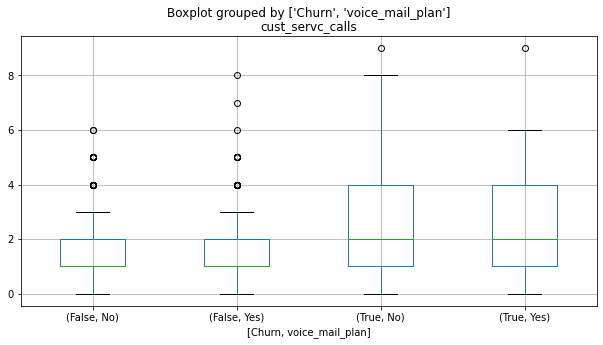

In [ ]:
new_df.boxplot(column=['cust_servc_calls'], by=['Churn','voice_mail_plan'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f9482450>,
      dtype=object)

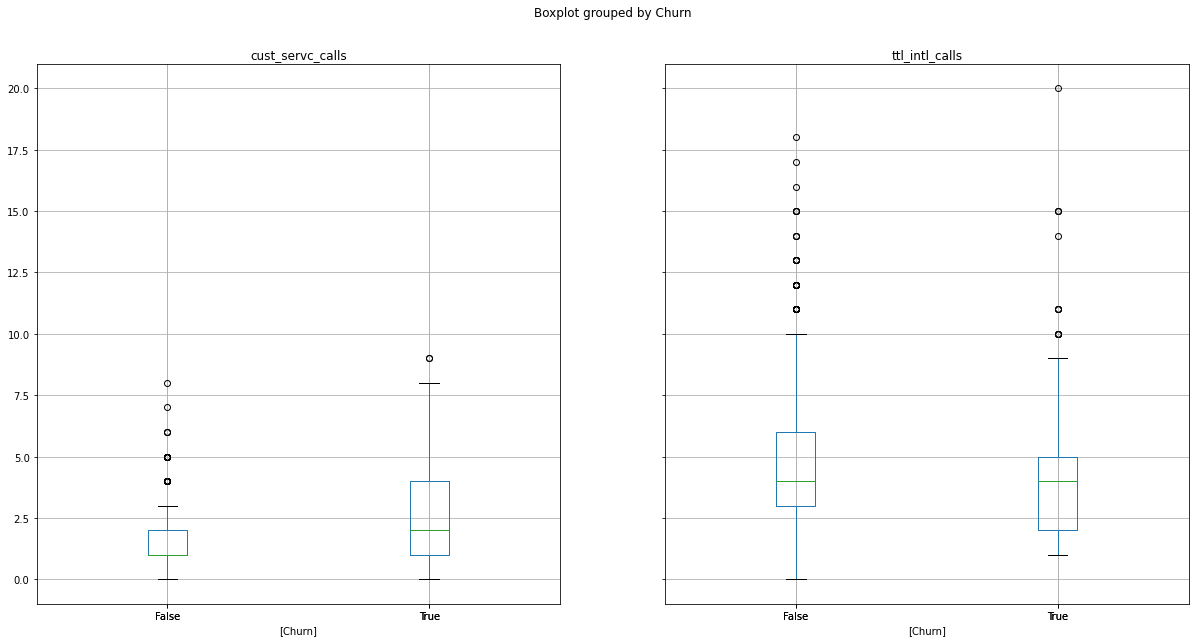

In [ ]:
new_df.boxplot(column=['cust_servc_calls','ttl_intl_calls'], by=['Churn','intl_plan'])

Churners with no international plan are  making more customer service calls.


In [ ]:
df6 = new_df.groupby(['Churn','intl_plan'])['intl_plan'].count()
df6.unstack()

# people having intl plan with false churning:

percent_false_intl = (df6.loc[False,'Yes']/df6.loc[False].sum())*100
print('The % of customers with false churning having intl plan is', round(percent_false_intl,2),'%')

# people having intl plan with true churning:

percent_true_intl  = (df6.loc[True,'Yes']/df6.loc[True].sum())*100
print('The % of customers with true churning having intl plan is',round(percent_true_intl,2),'%')

df6.unstack()


The % of customers with false churning having intl plan is 6.21 %
The % of customers with true churning having intl plan is 29.62 %


intl_plan,No,Yes
Churn,,
False,1826,121
True,278,117


Text(0, 0.5, 'International plan')

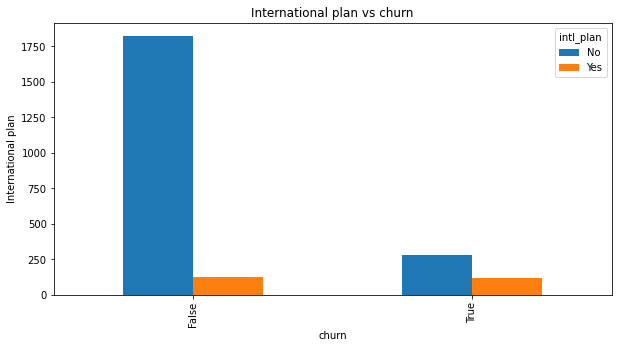

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df6.unstack().plot(kind='bar')
plt.title('International plan vs churn')
plt.xlabel('churn')
plt.ylabel('International plan')


***The % of customers with false churning having intl plan is 6.21 % ***

***The % of customers with true churning having intl plan is 29.62 % ***

In [ ]:
0.loyal customer -86%  churning cust.-14%
1.State wise churning percentage
2.state wise distribution of customer service calls , people who are getting more service calls are leaving
3.percentage of people having international plans for true churners is higher
4.loyal customer prefer voice mail plan more than churning customer
5.vmail message vs churning 
6.